In [26]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [58]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

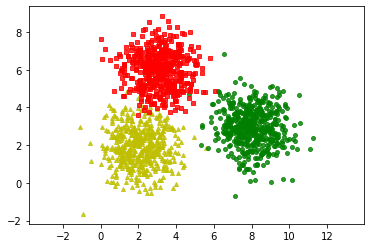

In [59]:
def kmeans_display(X, label, centroids = None):
    color_list = ['y^', 'go', 'rs', 'co']
    K = np.amax(label) + 1
    
    for i in range(K):
        plt.plot(X[label == i, :][:, 0], X[label == i, :][:, 1], color_list[i], markersize = 4, alpha = .8)
    
    if centroids is not None:
        plt.plot(centroids[:, 0], centroids[:,1], 'bo')
    
    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [60]:
def generate_centroids(data, k):
    return X[np.random.choice(X.shape[0], k, replace=False), :]

def closest_centroid(data, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(data, closest, centroids):
    return np.array([data[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [114]:
centroids = generate_centroids(X, 3)

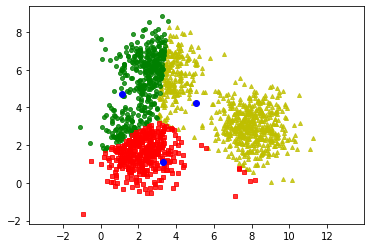

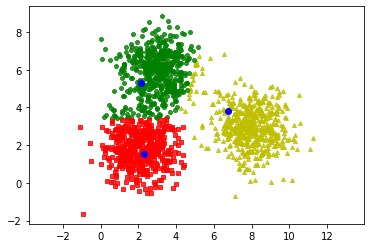

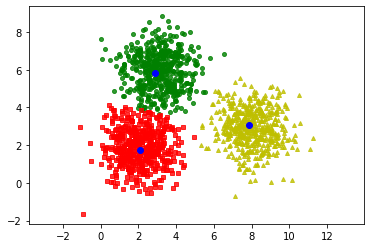

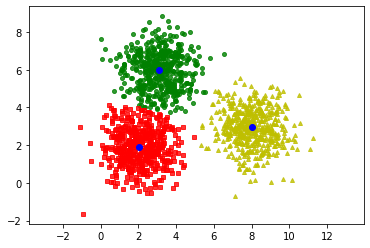

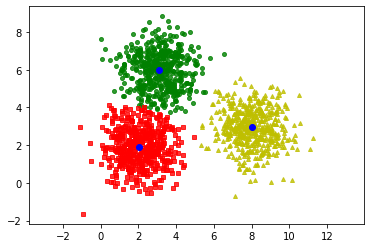

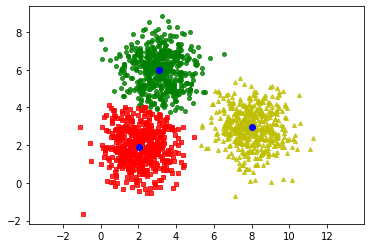

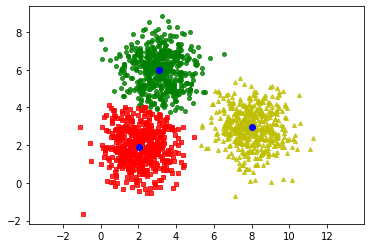

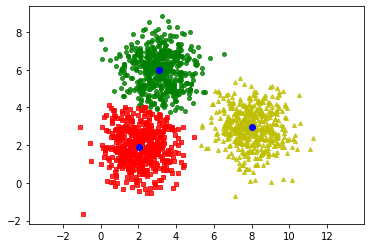

In [115]:
while True:
    label = closest_centroid(X, centroids)
    new_centroids = move_centroids(X, label, centroids)
    new_label = closest_centroid(X, new_centroids)
    kmeans_display(X, new_label, new_centroids)
    if np.all(label == new_label):
        break
    label = new_label
    centroids = new_centroids
kmeans_display(X, new_label, new_centroids)